# 방범용CCTV 위치와 인구 데이터분석
- https://data.busan.go.kr/
- 파일데이터 "부산광역시_방범용 CCTV 정보_20230622.CSV" 다운로드
- 목표: CCTV 수와 인구대비 CCTV 비율을 파악
- 인구대비 CCTV의 평균치를 확인하고 그로부터 CCTV가 과하게 부족한 구를 확인

In [1]:
!pwd

/home/jovyan/data


In [2]:
import pandas as pd
file_path = "./ref/부산방범용CCTV정보20230622.csv"
CCTV = pd.read_csv(file_path, encoding="EUC-KR")
CCTV.sample(3)

,CCTV 명칭,CCTV 좌표,CCTV 그룹
1271,(5차)_대연동_238-20_대남초교앞,"10.1.10.43:0:0:0:0:0:0,10.1.10.43:9400:",남구-5차
4775,부산_4_0070_영선아파트입구_영선2동_향토길12,"10.1.10.122:0:0:0:0:0:0,10.1.10.122:9400:",영도-4차
1247,(4차고1)_문현2동_605_아이사랑어린이집앞,"10.1.10.42:0:0:0:0:0:0,10.1.10.42:9400:",남구-4차


In [3]:
# CCTV.columns = ["x","xx","local"]
cctv = CCTV.rename(columns={"CCTV 그룹":"local"})['local']

In [4]:
# 방법1
cctv = cctv.apply(lambda x: x.split("-")[0])

# 방법2
# local_list = []
# for v in cctv:
#     local_list.append(v.split("-")[0])
# cctv = pd.Series(local_list)    

# 방법3
# cctv = cctv.str.extract(r"(\D+)-")[0]

cctv = cctv.value_counts()
cctv = cctv.reset_index()

In [5]:
cctv.sample(3)

,local,count
6,진구,395
14,기장,344
9,동구,374


- 행정동별 연령별 인구현황
- https://jumin.mois.go.kr/ageStatMonth.do
  <hr>
  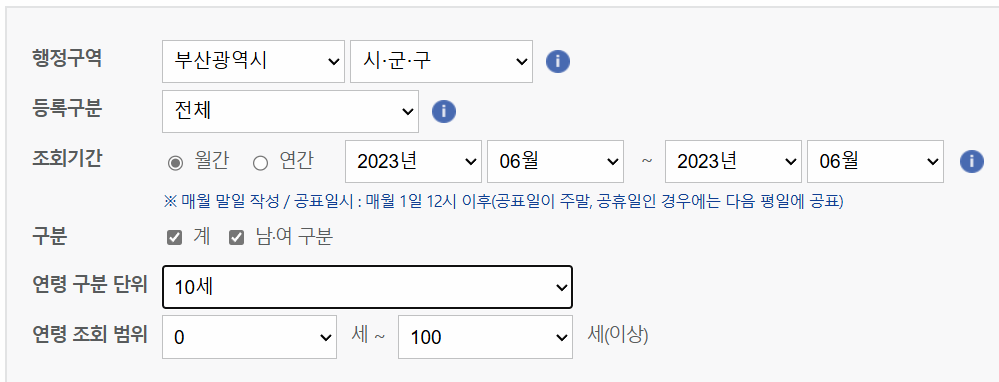

In [6]:
import pandas as pd
import warnings
warnings.simplefilter("ignore", UserWarning)

file_path2 = "./ref/연령별인구현황월간202306.xlsx"
ori = pd.read_excel(file_path2,sheet_name="연령별인구현황",skiprows=3)
ori.head(2)

,행정기관코드,행정기관,총 인구수,연령구간인구수,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,...,10~19세.2,20~29세.2,30~39세.2,40~49세.2,50~59세.2,60~69세.2,70~79세.2,80~89세.2,90~99세.2,100세 이상.2
0,2600000000,부산광역시,"3,306,993","3,306,993","200,627","264,771","386,558","393,792","489,807","539,964",...,"128,872","187,837","191,071","242,526","276,337","296,378","172,706","87,000","13,119",384
1,2611000000,부산광역시 중구,"39,311","39,311",931,"1,773","5,638","4,310","4,582","6,423",...,914,"2,964","2,037","2,096","3,078","4,109","2,877","1,532",251,15


In [7]:
cctv

,local,count
0,사하,431
1,사상,422
2,해운대,418
3,동래,404
4,금정,403
5,북구,403
6,진구,395
7,영도,381
8,연제,377
9,동구,374


In [8]:
data = ori[['행정기관','총 인구수']]
data.columns = ["local","population"]
data = data.loc[1:]
data['local'] = data['local'].apply(lambda x: x.replace("부산광역시 ","").strip())
data = data.reset_index(drop=True) # drop = True는 기존 인덱스를 삭제하고 새롭게 부여
data

,local,population
0,중구,"39,311"
1,서구,"104,449"
2,동구,"86,809"
3,영도구,"107,006"
4,부산진구,"357,475"
5,동래구,"272,590"
6,남구,"255,786"
7,북구,"276,684"
8,해운대구,"383,355"
9,사하구,"300,922"


In [9]:
# cctv = cctv.sort_values(by="local", ascending=True)
# data = data.sort_values(by="local", ascending=True)
# 방법 1
# total.columns = ['local','count','localx','population']
# total = total.drop(columns=['localx'])
# total = pd.concat([cctv,data],axis=1)
# 방법 2
# total = total.drop(total.columns[2],axis=1) # 이름이 같을경우 인덱스가 사용안됨.
# total

In [10]:
# 공백 조심 data["local"] = data["local"].apply(lambda x: len(x))
data["local"] = data["local"].apply(lambda x: x.replace("구","").replace("군","").replace("부산진","진구").strip() if len(x.strip())>2 else x.strip())

In [11]:
total = pd.merge(cctv, data, on='local')
total['population'] = total['population'].str.replace(",","").astype(int)
total = total.sort_values(by="population", ascending=False)
total = total.set_index('local') # 중요함.
total

,count,population
local,,
해운대,418,383355
진구,395,357475
사하,431,300922
북구,403,276684
동래,404,272590
남구,351,255786
금정,403,218711
사상,422,203029
연제,377,202919


Text(0.2, 0.4, '한글')

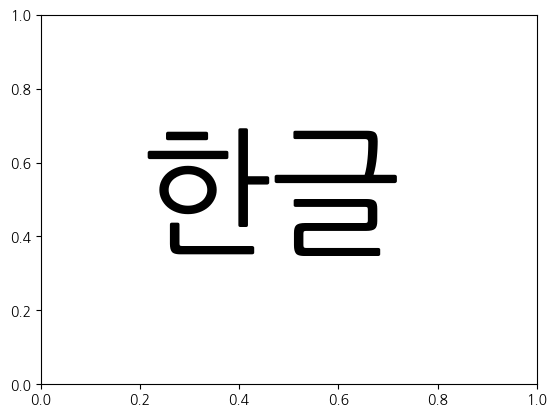

In [12]:
# OS에 사용가능한 , 설치된 폰트를 나열
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm

# 리눅스용 폰트 경로 설정
plt.rc('font', family="NanumGothic")
plt.text(0.2,0.4,'한글',size=100)

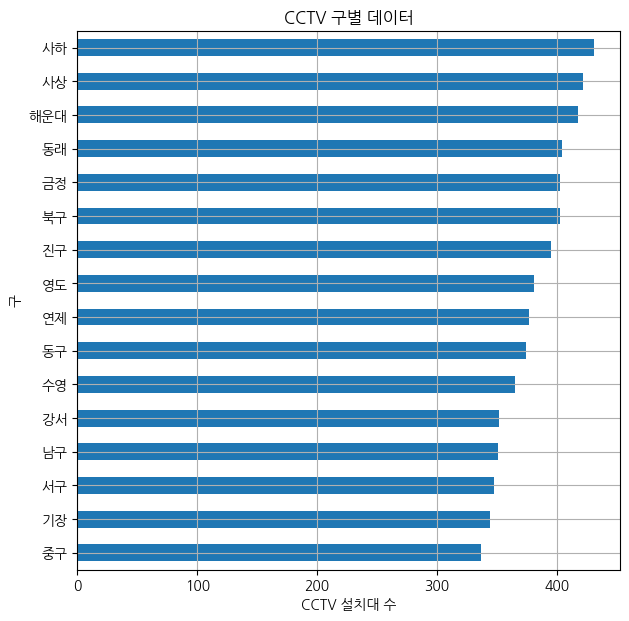

In [13]:
# plt.figure()
total['count'].sort_values().plot( kind="barh",grid=True,figsize=(7,7), ylabel="구")

plt.title("CCTV 구별 데이터")
plt.xlabel("CCTV 설치대 수")
plt.show()

[]

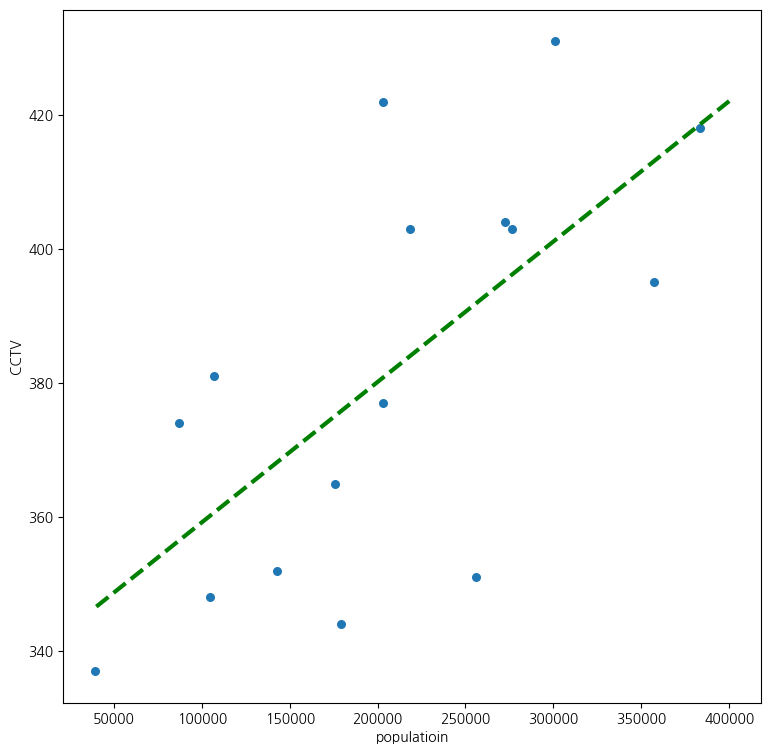

In [14]:
import numpy as np
fp1 = np.polyfit(total['population'],total['count'], 1)
f1 = np.poly1d(fp1)
fx = np.linspace(40000,400000,10)
plt.figure(figsize=(9,9))
plt.plot(fx,f1(fx), ls='dashed', lw=3, color='g')
plt.scatter(total['population'], total['count'], s= 30)
plt.xlabel('populatioin')
plt.ylabel('CCTV')
plt.plot()

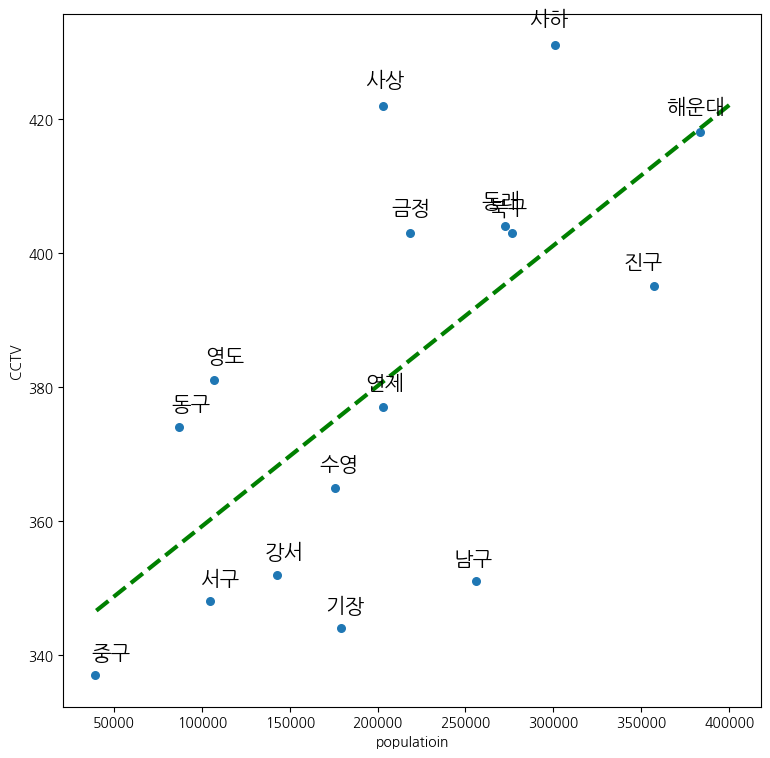

In [30]:
import numpy as np
fp1 = np.polyfit(total['population'],total['count'], 1) # x축, y축, 1은 기울기
f1 = np.poly1d(fp1)
fx = np.linspace(40000,400000,10)
plt.figure(figsize=(14,8))
plt.plot(fx,f1(fx), ls='dashed', lw=3, color='g')

# 오차
total['err'] = np.abs(total['count'] - f1(total['population']))


plt.scatter(total['population'], total['count'], s= 30, c = total['err'])
plt.xlabel('populatioin')
plt.ylabel('CCTV')
plt.plot()



# 점마다 각 동의 이름을 부여
for i in range(len(total['population'])):
    plt.text(total['population'].iloc[i]*0.95, total['count'].iloc[i]*1.007, total.index[i], fontsize=15)
plt.grid()
plt.colorbar()
plt.show()    